In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import OneHotEncoder
import re
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
train_raw=pd.read_csv('train_LTFS.csv')
df=train_raw.copy(deep=True)

In [ ]:
train_raw
# ltv= loan to value
# Date.of.Birth---> age
# Employment.Type---> encode, onehot? only this column has nan. 
# DisbursalDate: how to deal with?
# Aadhar_flag: aadhar is identity number.
# PAN_flag: What's pan?
# PERFORM_CNS.SCORE: very interesting!!! 
# PERFORM_CNS.SCORE.DESCRIPTION: could merge with PERFORM_CNS.SCORE
# PRI.NO.OF.ACCTS: count of total loans taken by the customer at the time of disbursement Primary accounts are those which the customer has taken for his personal use

# PRI.ACTIVE.ACCTS: count of active loans taken by the customer at the time of disbursement. PRI:Primary accounts are those which the customer has taken for his personal 
# PRI.OVERDUE.ACCTS: count of default accounts at the time of disbursement
# PRI.CURRENT.BALANCE: total Principal outstanding amount of the active loans at the time of disbursement 发放时活动贷款的本金总额 note: 
# PRI.SANCTIONED.AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement 发放时对所有贷款批准的总金额
# PRI.DISBURSED.AMOUNT: total amount that was disbursed for all the loans at the time of disbursement 发放时已为所有贷款支付的总金额
# SEC.NO.OF.ACCTS, SEC:Secondary accounts are those which the customer act as a co-applicant or gaurantor
# PRIMARY.INSTAL.AMT: EMI,equated monthly installment, is the monthly amount payments we make towards a loan we opted to
# DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: Loans defaulted in the last 6 months
# AVERAGE.ACCT.AGE: Average loan tenure
# CREDIT.HISTORY.LENGTH: Time since first loan
# NO.OFINQUIRIES: inquiries done by the customer for loans 询价

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [ ]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

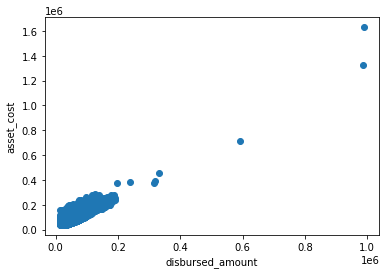

In [ ]:
plt.scatter(df['disbursed_amount'], df['asset_cost'])
plt.xlabel('disbursed_amount')
plt.ylabel('asset_cost')
plt.savefig('colinear.png',dpi=150)

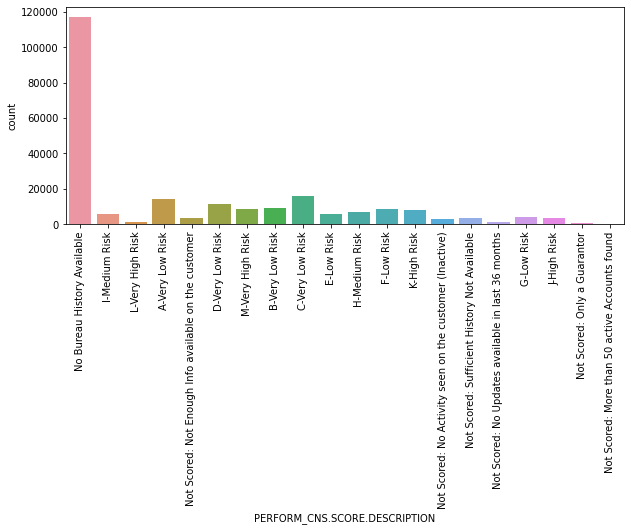

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='PERFORM_CNS.SCORE.DESCRIPTION',data=train_raw)
plt.xticks(rotation = 90)
plt.savefig('description.png',dpi=150, bbox_inches='tight')
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [ ]:
df.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [ ]:
df['Employment.Type'].isna().value_counts(normalize=True)

False    0.967142
True     0.032858
Name: Employment.Type, dtype: float64

In [ ]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

(array([129785.,      0.,      0.,  10010.,   4292.,   4545.,  13155.,
         26251.,  30743.,  14373.]),
 array([  0.,  89., 178., 267., 356., 445., 534., 623., 712., 801., 890.]),
 <BarContainer object of 10 artists>)

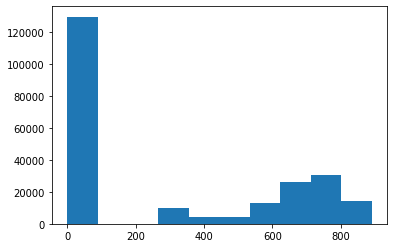

In [ ]:
plt.hist(df['PERFORM_CNS.SCORE'])

In [ ]:
for i in range(len(df)):
    if np.abs(df['PRI.DISBURSED.AMOUNT'][i]-df['PRI.SANCTIONED.AMOUNT'][i])>0:
        print(df['PRI.DISBURSED.AMOUNT'][i],df['PRI.SANCTIONED.AMOUNT'][i])

408007 404450
4711159 4705826
34589 84000
15000 30000
359005 407979
7848090 7901800
1528848 1800660
441664 558372
0 60000
3181181 3106405
67300 65203
2193857 1942025
382911 387200
510863 564500
1013053 1102388
315000 219000
121850 135000
9605 40000
45208 48000
509746 549992
132311 167227
185000 235000
1640873 1640390
6422084 6409059
4162859 4160239
564902 574615
771291 768587
630489 616000
24401 35000
281947 250990
7699017 7688259
357692 438000
3956195 4069603
2251963 2221505
182612 177384
111811 275085
361383 357427
215843 208759
381429 377255
1335209 1333002
48612 30003
165000 210000
650224 655047
97662 95841
9550 15000
261046 259494
137712 141650
496373 553798
1329620 1317659
185878 271000
696530 806973
551019 681738
120018 46774
93686 90899
321235 357812
1149 20000
32125 32884
1498720 1496457
250993 276101
696870 695500
149290 97290
55480 82000
2128330 2521961
848942 837500
1071574 1085900
11762 30000
41999 116999
513521 511129
111178 168124
770293 795055
1355120 1362162
1109033 13

In [ ]:
df['SEC.ACTIVE.ACCTS'].value_counts()

0     229337
1       2684
2        636
3        195
4        116
5         65
6         32
7         22
8         17
9         11
10         9
11         7
12         6
15         4
13         3
16         2
22         2
14         1
17         1
20         1
21         1
26         1
36         1
Name: SEC.ACTIVE.ACCTS, dtype: int64

In [ ]:
def calculate_age(birthDate):
    d,m,y = birthDate.split('-')
    if int(y) < 21: y='20'+y
    else: y= '19'+y
    b = date(int(y),int(m),int(d))
    today=date.today()
    return today.year - b.year - ((today.month, today.day) <(b.month, b.day))

In [ ]:
# transform birthDate to age
df['Date.of.Birth']=df['Date.of.Birth'].apply(lambda x: calculate_age(x))
df=df.rename(columns={'Date.of.Birth': 'Age'})

In [ ]:
df['Employment.Type'].isna().value_counts()

False    225493
True       7661
Name: Employment.Type, dtype: int64

In [ ]:
# one hot encoding Employment.Type

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df[['Employment.Type']]).toarray())
df=df.join(enc_df)
# rename columns name 
df.columns = df.columns.astype(str) # last 0,1,2 is integer
df=df.rename(columns={'0': 'Salaried',
                       '1': 'Self_employed',
                       '2': 'Unknown_employ'})
df=df.drop('Employment.Type',axis=1)

In [ ]:
def yrs_mon_to_month(s):
    sp=re.split('yrs|mon',s)
    return int(sp[0])*12 + int(sp[1])

In [ ]:
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda s: yrs_mon_to_month(s))
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda s: yrs_mon_to_month(s))

In [ ]:
# transform DisbursalDate to month
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate'],errors='coerce',dayfirst=True).dt.month
df=df.rename(columns={'DisbursalDate': 'DisbursalMonth'})
df['DisbursalMonth'].value_counts()  

10    98364
8     68002
9     66788
Name: DisbursalMonth, dtype: int64

In [ ]:
df=pd.get_dummies(df, columns=["DisbursalMonth"], prefix=["DisbursalMonth"] ) # the type of last columns is unicode8, change them to int

In [ ]:
df['DisbursalMonth_8'] = df['DisbursalMonth_8'].astype(int)
df['DisbursalMonth_9'] = df['DisbursalMonth_8'].astype(int)
df['DisbursalMonth_10'] = df['DisbursalMonth_8'].astype(int)

In [ ]:
df['Employee_code_ID'].value_counts()

2546    628
620     502
255     494
130     408
2153    401
       ... 
3548      1
3280      1
3719      1
2875      1
3330      1
Name: Employee_code_ID, Length: 3270, dtype: int64

In [ ]:
df['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

In [ ]:
df['branch_id'].value_counts()

2      13138
67     11328
3       9230
5       9218
36      8832
       ...  
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: int64

In [ ]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,State_ID,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self_employed,Unknown_employ,DisbursalMonth_8,DisbursalMonth_9,DisbursalMonth_10
0,420825,50578,58400,89.55,67,22807,45,1441,37,6,...,0,0,0,0,1.0,0.0,0.0,1,1,1
1,537409,47145,65550,73.23,67,22807,45,1502,35,6,...,23,23,0,1,0.0,1.0,0.0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,35,6,...,0,0,0,0,0.0,1.0,0.0,1,1,1
3,624493,57513,66113,88.48,67,22807,45,1501,27,6,...,8,15,1,1,0.0,1.0,0.0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,43,6,...,0,0,1,1,0.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,32,6,...,21,39,0,0,1.0,0.0,0.0,0,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,32,6,...,6,6,0,0,0.0,1.0,0.0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,44,4,...,0,0,0,0,1.0,0.0,0.0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,27,4,...,0,0,0,0,1.0,0.0,0.0,0,0,0


In [ ]:
def encode_description(X):
    '''

    '''
    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                     'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor'),(0, 0, 0, 0, 0, 0))

    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('L-Very High Risk', 'M-Very High Risk', 
                                     'Not Scored: More than 50 active Accounts found'), (1, 1, 1))

    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

    X['PERFORM_CNS.SCORE.DESCRIPTION'] = X['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                      'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))
    X=X.drop(['PERFORM_CNS.SCORE'], axis=1) # drop PERFORM_CNS.SCORE

In [ ]:
encode_description(df)
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

0    129782
5     50728
4     18294
3     12412
2     12025
1      9913
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [ ]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,State_ID,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self_employed,Unknown_employ,DisbursalMonth_8,DisbursalMonth_9,DisbursalMonth_10
0,420825,50578,58400,89.55,67,22807,45,1441,37,6,...,0,0,0,0,1.0,0.0,0.0,1,1,1
1,537409,47145,65550,73.23,67,22807,45,1502,35,6,...,23,23,0,1,0.0,1.0,0.0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,35,6,...,0,0,0,0,0.0,1.0,0.0,1,1,1
3,624493,57513,66113,88.48,67,22807,45,1501,27,6,...,8,15,1,1,0.0,1.0,0.0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,43,6,...,0,0,1,1,0.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,32,6,...,21,39,0,0,1.0,0.0,0.0,0,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,32,6,...,6,6,0,0,0.0,1.0,0.0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,44,4,...,0,0,0,0,1.0,0.0,0.0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,27,4,...,0,0,0,0,1.0,0.0,0.0,0,0,0


In [ ]:
df.Salaried.value_counts()

0.0    135296
1.0     97858
Name: Salaried, dtype: int64

In [ ]:
df.Self_employed.value_counts()

1.0    127635
0.0    105519
Name: Self_employed, dtype: int64

In [ ]:
default = df[df['loan_default']==1]
non_default = df[df['loan_default']==0]

In [ ]:
score = np.arange(0,6,1)
score_default=[]
score_nondefault=[]
for i in score:
    x1 = len(default[default['PERFORM_CNS.SCORE.DESCRIPTION']== i])
    x2 = len(non_default[non_default['PERFORM_CNS.SCORE.DESCRIPTION']== i])
    score_default.append(x1)
    score_nondefault.append(x2)

In [ ]:
score_default

[29815, 2991, 3248, 3173, 3366, 8018]

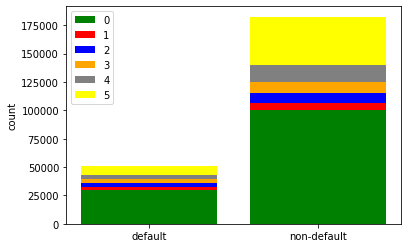

In [ ]:
color = ['green','red','blue','orange','gray','yellow']
x_ticks= ["default","non-default"]
for i in score:
    plt.bar(x_ticks[0],score_default[i],bottom=np.sum(score_default[:i],axis = 0),label=str(i),fc = color[i])
    plt.bar(x_ticks[1],score_nondefault[i],bottom=np.sum(score_nondefault[:i],axis = 0),fc = color[i])
plt.xticks(x_ticks)
plt.ylabel('count')
plt.legend(loc='best')
plt.show()


In [ ]:
default_list = [len(default[default['Salaried']==1]), len(default[default['Self_employed']==1]), len(default[default['Unknown_employ']==1])]
non_default_list = [len(non_default[non_default['Salaried']==1]), len(non_default[non_default['Self_employed']==1]), len(non_default[non_default['Unknown_employ']==1])]

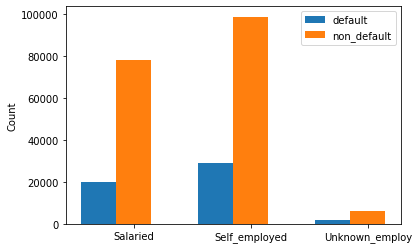

In [ ]:
x_xais=[i for i in range(1,4)]
width = 0.3
ax1 = plt.bar(x_xais,default_list, width, label="default")
x_xais=[i+width for i in x_xais]
ax2 = plt.bar(x_xais,non_default_list, width, label="non_default")
plt.xticks(x_xais,['Salaried','Self_employed','Unknown_employ'])
plt.ylabel("Count")
plt.legend(loc='best')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85463a1c-f246-4a97-953d-d1ccc73b61e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>